In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [31]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay

In [3]:
data1_filename = "diabetes_binary_health_indicators_BRFSS2015.csv"
df1 = pd.read_csv(data1_filename)

In [4]:
df1.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
# Taken from datacard on Kaggle, augmented by descriptions given in primary source.

column_descriptions = {
    'Diabetes_012':"0 = no diabetes 1 = diabetes",
     'HighBP':"0 = no high BP 1 = high BP",
     'HighChol':"0 = no high cholesterol 1 = high cholesterol",
     'CholCheck':"0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years",
     'BMI':"Body Mass Index",
     'Smoker':"Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes",
     'Stroke':"(Ever told) you had a stroke. 0 = no 1 = yes",
     'HeartDiseaseorAttack':"coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes",
     'PhysActivity':"physical activity in past 30 days - not including job 0 = no 1 = yes",
     'Fruits':"Consume Fruit 1 or more times per day 0 = no 1 = yes ",
     'Veggies':"Consume Vegetables 1 or more times per day 0 = no 1 = yes",
     'HvyAlcoholConsump':"Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no",
     'AnyHealthcare':"Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes",
     'NoDocbcCost':"Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes",
     'GenHlth':"Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor",
     'MentHlth':"Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days",
     'PhysHlth':"Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days",
     'DiffWalk':"Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes",
     'Sex':"0 = female 1 = male",
     'Age':"13-level age category (_AGEG5YR see codebook) 1 = 18-24, 2 = 25-29, 3 = 30-34, etc, 9 = 60-64, 13 = 80 or older",
     'Education':"Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)",
     'Income':"Income scale (INCOME2 see codebook) scale 1-8. 1 = less than $10k, 2 = less than $15k, 3 = less than $20k, 4 = less than $25k, 5 = less than $35k, 6 = less than $50k, 7 = less than $75k, 8 = $75k or more"
}

In [6]:
df1.nunique()

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [8]:
y = df1["Diabetes_binary"].astype(int)
X = df1.drop(columns=["Diabetes_binary"])

In [9]:
binary_cols = [c for c in X.columns if set(pd.unique(X[c].dropna())) <= {0, 1}]
numeric_cols = [c for c in X.columns if c not in binary_cols]

In [10]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("bin", "passthrough", binary_cols),
    ],
    remainder="drop",
)

In [11]:
logreg = LogisticRegression(
    penalty="l2",
    C=1.0,
    solver="liblinear",
    max_iter=1000
)

In [12]:
clf = Pipeline([("prep", preprocess), ("model", logreg)])

# test/train split
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# scores = cross_validate(
#     clf, X_tr, y_tr, cv=cv,
#     scoring=["roc_auc", "average_precision", "accuracy", "f1"]
# )
# print({k: np.mean(v) for k, v in scores.items() if k.startswith("test_")})

In [13]:
# fit
clf.fit(X_tr, y_tr)
y_proba = clf.predict_proba(X_te)[:, 1]

In [17]:
precision, recall, thresh = precision_recall_curve(y_te, y_proba)
f1 = 2 * precision * recall / (precision + recall + 1e-12)
best_t = (thresh[np.argmax(f1)] if len(thresh) else 0.5)
print("Best F1 threshold:", best_t)

Best F1 threshold: 0.19958307215376556


In [19]:
y_pred = (y_proba >= best_t).astype(int)
print(classification_report(y_te, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.932     0.817     0.871     43667
           1      0.359     0.634     0.458      7069

    accuracy                          0.791     50736
   macro avg      0.646     0.725     0.665     50736
weighted avg      0.852     0.791     0.813     50736



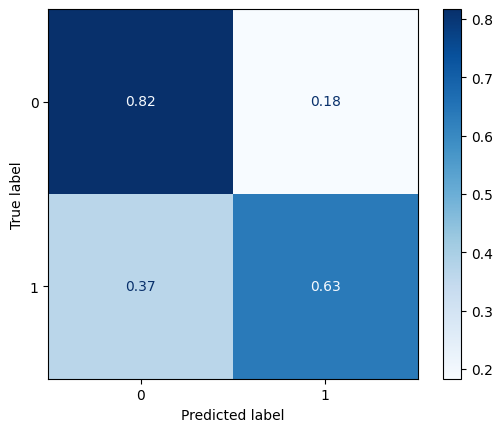

In [35]:
labels = sorted(set(y_te) | set(y_pred))
cm = confusion_matrix(y_te, y_pred, labels=labels, normalize='true')
ConfusionMatrixDisplay(cm, display_labels=labels).plot(cmap="Blues")
plt.show()